In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

In [10]:
df1=fetch_california_housing()

In [11]:
print(df1.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [12]:
df1

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [13]:
df=pd.DataFrame(df1.data,columns=df1.feature_names)
df['target']=df1.target

In [14]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
df.shape

(20640, 9)

In [17]:
df=df.sample(frac=0.25)

In [18]:
df.shape

(5160, 9)

In [20]:
X=df.iloc[:,:-1]
y=df['target']

In [21]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18850,1.1915,45.0,5.594378,1.180723,521.0,2.092369,41.31,-122.32
11398,5.9582,21.0,6.176938,0.960239,1688.0,3.355865,33.72,-117.95
17619,5.1104,30.0,5.280443,1.003690,1387.0,2.559041,37.27,-121.93
2989,1.5357,35.0,4.810496,1.137026,1145.0,3.338192,35.34,-119.02
8666,5.1450,19.0,4.216033,1.094429,2455.0,1.667799,33.83,-118.43
...,...,...,...,...,...,...,...,...
2788,4.3750,21.0,6.350000,1.071154,1413.0,2.717308,37.35,-118.42
10649,3.8210,39.0,4.535363,1.156670,1915.0,1.714414,33.55,-117.79
12453,2.0833,27.0,5.088235,1.029412,117.0,3.441176,33.52,-114.57
3736,3.5711,32.0,4.707965,1.136536,1912.0,2.417193,34.18,-118.40


In [22]:
y

18850    0.719
11398    2.880
17619    2.781
2989     0.565
8666     4.202
         ...  
2788     1.804
10649    4.521
12453    0.450
3736     3.127
16822    2.750
Name: target, Length: 5160, dtype: float64

In [23]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
regressor=DecisionTreeRegressor()

In [26]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
y_pred=regressor.predict(X_test)

In [28]:
y_pred

array([4.534  , 3.145  , 1.261  , ..., 1.36   , 4.868  , 5.00001])

In [29]:
from sklearn.metrics import r2_score

In [30]:
score=r2_score(y_test,y_pred)

In [31]:
score

0.5648587044737393

In [32]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [36]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [39]:
reg=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [41]:
reg.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [42]:
reg.best_params_

{'criterion': 'poisson',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [43]:
regressor=DecisionTreeRegressor(criterion='poisson',max_depth=5,max_features='auto',splitter='best')

In [44]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5, max_features='auto')

In [45]:
y_pred=regressor.predict(X_test)

In [46]:
score=r2_score(y_test,y_pred)

In [47]:
score

0.6093593034743747

In [48]:
import matplotlib.pyplot as plt

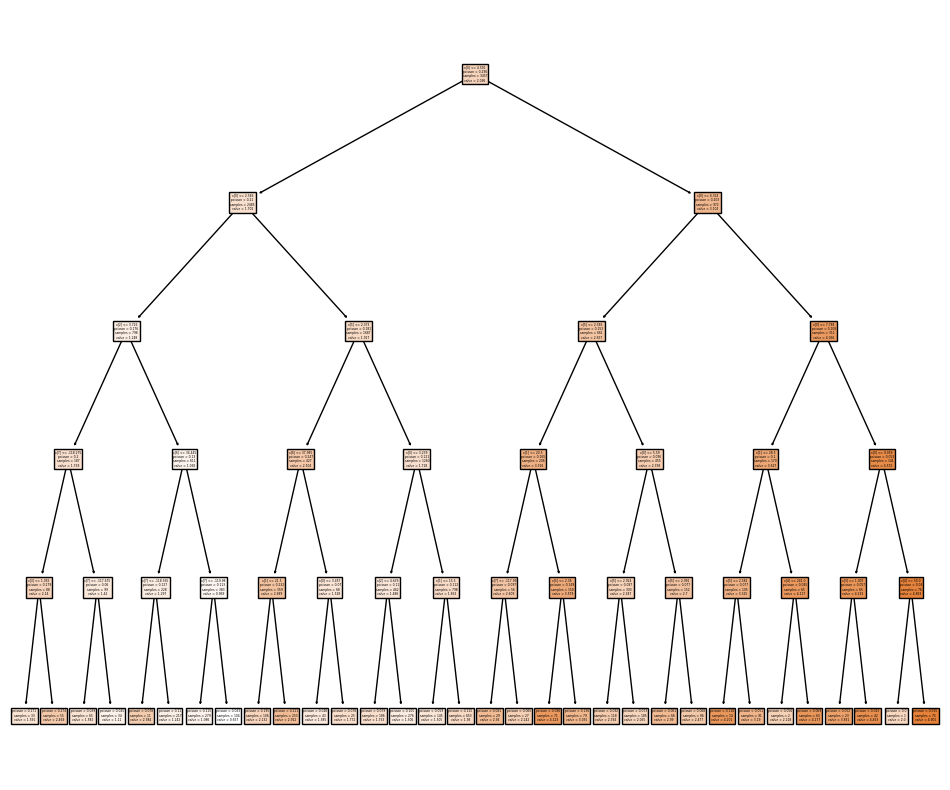

In [50]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()